# Pyspark Tutorial:

This notebook present an introduction to the pyspark library.
It show how to:
- Load datas with pyspark.
- Create Datas Visualisations with pyspark and the libraries matplotlib or seaborn.
- Apply Pre-Processing methods on dataset.
- Fit several Machine Learning models such as Multilinear Regression one with pyspark tools.
- Make predictions on the test dataset, with the fitted models on train dataset.

The dataset used is available on Kaggle: https://www.kaggle.com/datasets/abdullah0a/human-age-prediction-synthetic-dataset/data

##### Description :
This dataset group several features based on human's health levels and lifestyles, in order to predict their age. It's composed of 3000 rows, with 24 features.

In [1]:
# Packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pyspark 
import os

## Load of the csv file, with Pandas:

In [2]:
# Specification of the files name on the repertository:
file_csv = "Train.csv"

# Loading of the csv file' datas on a Pandas DataFrame:
df_train=pd.read_csv(file_csv,sep=",")
df_train.head(5)

,Gender,Height (cm),Weight (kg),Blood Pressure (s/d),Cholesterol Level (mg/dL),BMI,Blood Glucose Level (mg/dL),Bone Density (g/cm²),Vision Sharpness,Hearing Ability (dB),...,Family History,Cognitive Function,Mental Health Status,Sleep Patterns,Stress Levels,Pollution Exposure,Sun Exposure,Education Level,Income Level,Age (years)
0,Male,171.148359,86.185197,151/109,259.465814,29.423017,157.652848,0.132868,0.200000,58.786198,...,None,44.059172,Good,Insomnia,2.797064,5.142344,7.108975,None,Medium,89
1,Male,172.946206,79.641937,134/112,263.630292,26.626847,118.507805,0.629534,0.267312,54.635270,...,Heart Disease,45.312298,Good,Normal,9.339930,7.272720,3.918489,Undergraduate,Medium,77
2,Female,155.945488,49.167058,160/101,207.846206,20.217553,143.587550,0.473487,0.248667,54.564632,...,Hypertension,56.246991,Poor,Insomnia,9.234637,8.500386,5.393408,None,Medium,70
3,Female,169.078298,56.017921,133/94,253.283779,19.595270,137.448581,1.184315,0.513818,79.722963,...,Hypertension,55.196092,Poor,Insomnia,4.693446,7.555511,2.745578,None,Low,52
4,Female,163.758355,73.966304,170/106,236.119899,27.582078,145.328695,0.434562,0.306864,52.479469,...,None,53.023379,Good,Normal,4.038537,9.429097,3.878435,Undergraduate,High,79


In [3]:
df_train.isna().sum()

Gender                         0
Height (cm)                    0
Weight (kg)                    0
Blood Pressure (s/d)           0
Cholesterol Level (mg/dL)      0
BMI                            0
Blood Glucose Level (mg/dL)    0
Bone Density (g/cm²)           0
Vision Sharpness               0
Hearing Ability (dB)           0
Physical Activity Level        0
Smoking Status                 0
Alcohol Consumption            0
Diet                           0
Chronic Diseases               0
Medication Use                 0
Family History                 0
Cognitive Function             0
Mental Health Status           0
Sleep Patterns                 0
Stress Levels                  0
Pollution Exposure             0
Sun Exposure                   0
Education Level                0
Income Level                   0
Age (years)                    0
dtype: int64

Pandas is the more basic and the easiest Python library of data manipulation tools. We will see in the following, that even if pyspark's function are build to look like pandas ones, they are even different.

# I) Load of the csv file, with Pyspark:

In [4]:
from pyspark.sql import SparkSession

# SparkSession initialisation:
spark = SparkSession.builder.appName("Test PySpark CSV").getOrCreate()

- SparkSession.builder: Start a new Spark session.
- appName: Give a name for your session (optionnal, but useful for the monitoring).
- getOrCreate(): Create a new session, if not already existing, or use the existing one.

In [5]:
# Load the CSV file as a Pyspark DataFrame:
csv_file = "Train.csv"
df_train = spark.read.csv(csv_file, header=True, inferSchema=True)

# Load the CSV file with the test datas:
test_file = "Test.csv"
df_test = spark.read.csv(test_file, header=True, inferSchema=True)

- spark.read.csv(): Laod the CSV file on a DataFrame.
- header=True: Specify that the first file's row, contains columns names.
- inferSchema=True: ASK to PySpark to automatically guess the datatypes (Integer, String, etc.) for each column. If set to False, all the columns will be processed as String.

In [7]:
df_train.show(5) # Show the 5 first rows.

+------+------------------+------------------+--------------------+-------------------------+------------------+---------------------------+--------------------+-------------------+--------------------+-----------------------+--------------+-------------------+----------+----------------+--------------+--------------+------------------+--------------------+--------------+------------------+------------------+------------------+---------------+------------+-----------+
|Gender|       Height (cm)|       Weight (kg)|Blood Pressure (s/d)|Cholesterol Level (mg/dL)|               BMI|Blood Glucose Level (mg/dL)|Bone Density (g/cm²)|   Vision Sharpness|Hearing Ability (dB)|Physical Activity Level|Smoking Status|Alcohol Consumption|      Diet|Chronic Diseases|Medication Use|Family History|Cognitive Function|Mental Health Status|Sleep Patterns|     Stress Levels|Pollution Exposure|      Sun Exposure|Education Level|Income Level|Age (years)|
+------+------------------+------------------+--------

In [8]:
# Print the schema (datatypes of columns)
df_train.printSchema()

root
 |-- Gender: string (nullable = true)
 |-- Height (cm): double (nullable = true)
 |-- Weight (kg): double (nullable = true)
 |-- Blood Pressure (s/d): string (nullable = true)
 |-- Cholesterol Level (mg/dL): double (nullable = true)
 |-- BMI: double (nullable = true)
 |-- Blood Glucose Level (mg/dL): double (nullable = true)
 |-- Bone Density (g/cm²): double (nullable = true)
 |-- Vision Sharpness: double (nullable = true)
 |-- Hearing Ability (dB): double (nullable = true)
 |-- Physical Activity Level: string (nullable = true)
 |-- Smoking Status: string (nullable = true)
 |-- Alcohol Consumption: string (nullable = true)
 |-- Diet: string (nullable = true)
 |-- Chronic Diseases: string (nullable = true)
 |-- Medication Use: string (nullable = true)
 |-- Family History: string (nullable = true)
 |-- Cognitive Function: double (nullable = true)
 |-- Mental Health Status: string (nullable = true)
 |-- Sleep Patterns: string (nullable = true)
 |-- Stress Levels: double (nullable = t

### Informations on features of the 2 datasets (train and test):
- Height (cm): The height of the individual in centimeters.
- Weight (kg): The weight of the individual in kilograms.
- Blood Pressure (s/d): Blood pressure (systolic/diastolic) in mmHg.
- Cholesterol Level (mg/dL): Cholesterol level in milligrams per deciliter.
- BMI: Body Mass Index, calculated from height and weight.
- Blood Glucose Level (mg/dL): Blood glucose level in milligrams per deciliter.
- Bone Density (g/cm²): Bone density in grams per square centimeter.
- Vision Sharpness: Vision sharpness on a scale from 0 (blurry) to 100 (perfect).
- Hearing Ability (dB): Hearing ability in decibels.
- Physical Activity Level: Categorized as 'Low', 'Moderate', or 'High'.
- Smoking Status: Categorical values including 'Never', 'Former', and 'Current'.
- Alcohol Consumption: Frequency of alcohol consumption.
- Diet: Type of diet, categorized as 'Balanced', 'High Protein', 'Low Carb', etc.
- Chronic Diseases: Presence of chronic diseases (e.g., diabetes, hypertension).
- Medication Use: Usage of medication.
- Family History: Presence of family history of age-related conditions.
- Cognitive Function: Self-reported cognitive function on a scale from 0 (poor) to 100 (excellent).
- Mental Health Status: Self-reported mental health status on a scale from 0 (poor) to 100 (excellent).
- Sleep Patterns: Average number of sleep hours per night.
- Stress Levels: Self-reported stress levels on a scale from 0 (low) to 100 (high).
- Pollution Exposure: Exposure to pollution measured in arbitrary units.
- Sun Exposure: Average sun exposure in hours per week.
- Education Level: Highest level of education attained.
- Income Level: Annual income in USD.
- Age (years): The target variable representing the age of the individual.

The target feature Age (years) isn't on the test dataset, because we have to predict it, with our fitted Machine Learning Model on train dataset.

#### Goal/Task: Prediction of human age, based on the features of their healths and lifestyles.

### Some basic Data Manipulation operations with Pyspark DataFrames:

In [9]:
# Print specifics columns:
df_train.select("Gender", "Height (cm)").show()

+------+------------------+
|Gender|       Height (cm)|
+------+------------------+
|  Male|171.14835857585234|
|  Male|172.94620597548936|
|Female|155.94548794280936|
|Female|169.07829806820422|
|Female|163.75835547387342|
|  Male|174.89161661991756|
|  Male|178.58696612660123|
|Female|168.00291364657264|
|Female| 164.5469174643387|
|Female|164.83942574744128|
|  Male|179.59758131814786|
|  Male|183.47279043195647|
|  Male|173.33825627155332|
|Female|159.08140340368584|
|  Male| 180.7779144429162|
|  Male|187.69566603115234|
|Female| 165.8853486540823|
|Female|160.15093228035127|
|Female|158.30528493139374|
|Female|141.13098471818066|
+------+------------------+
only showing top 20 rows



In [10]:
# Filter the datas:
df_train.filter(df_train["Height (cm)"] > 190).show()

+------+------------------+-----------------+--------------------+-------------------------+------------------+---------------------------+--------------------+-------------------+--------------------+-----------------------+--------------+-------------------+----------+----------------+--------------+--------------+------------------+--------------------+--------------+------------------+-------------------+------------------+---------------+------------+-----------+
|Gender|       Height (cm)|      Weight (kg)|Blood Pressure (s/d)|Cholesterol Level (mg/dL)|               BMI|Blood Glucose Level (mg/dL)|Bone Density (g/cm²)|   Vision Sharpness|Hearing Ability (dB)|Physical Activity Level|Smoking Status|Alcohol Consumption|      Diet|Chronic Diseases|Medication Use|Family History|Cognitive Function|Mental Health Status|Sleep Patterns|     Stress Levels| Pollution Exposure|      Sun Exposure|Education Level|Income Level|Age (years)|
+------+------------------+-----------------+---------

In [11]:
# Computation of basic descriptive statistics

df_train.describe().show()

+-------+------+------------------+------------------+--------------------+-------------------------+------------------+---------------------------+--------------------+------------------+--------------------+-----------------------+--------------+-------------------+----------+----------------+--------------+--------------+------------------+--------------------+--------------+------------------+--------------------+--------------------+---------------+------------+------------------+
|summary|Gender|       Height (cm)|       Weight (kg)|Blood Pressure (s/d)|Cholesterol Level (mg/dL)|               BMI|Blood Glucose Level (mg/dL)|Bone Density (g/cm²)|  Vision Sharpness|Hearing Ability (dB)|Physical Activity Level|Smoking Status|Alcohol Consumption|      Diet|Chronic Diseases|Medication Use|Family History|Cognitive Function|Mental Health Status|Sleep Patterns|     Stress Levels|  Pollution Exposure|        Sun Exposure|Education Level|Income Level|       Age (years)|
+-------+------+--

# II) Create Data Visualisation using Pyspark:

### Example 1 : Scatter plot with PySpark and matplotlib

In [12]:
# Filter the datas to get columns to plot:
column1="Weight (kg)"
column2="Height (cm)"
column3="Gender"
df_filtered = df_train.select(column1, column2, column3).dropna()

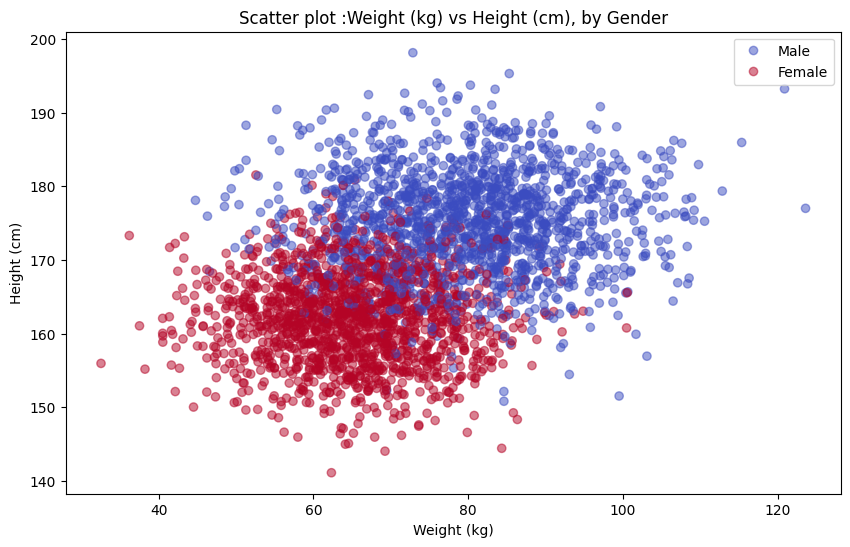

In [13]:
# Collect PySpark datas on a usable format with matplotlib:
data = df_filtered.collect()

# Convert datas in separated lists, for each columns:
x = [row[column1] for row in data]
y = [row[column2] for row in data]
genders = [row[column3] for row in data]

# Map the values of "Gender" as number for the colors:
# For example, 'Male' = 0, 'Female' = 1
color_map = {'Male': 0, 'Female': 1}
colors = [color_map[gender] for gender in genders]

# Build of the scatter plot using matplotlib:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(x, y, c=colors, cmap='coolwarm', alpha=0.5)
# Add legend:
plt.legend(handles=scatter.legend_elements()[0], labels=['Male', 'Female'])
plt.title("Scatter plot :"+column1+" vs "+column2+", by "+column3)
plt.xlabel(column1)
plt.ylabel(column2)
plt.show()

We observe as expectable, that mens are globally taller and heavier than womens.

### Use of Seaborn:

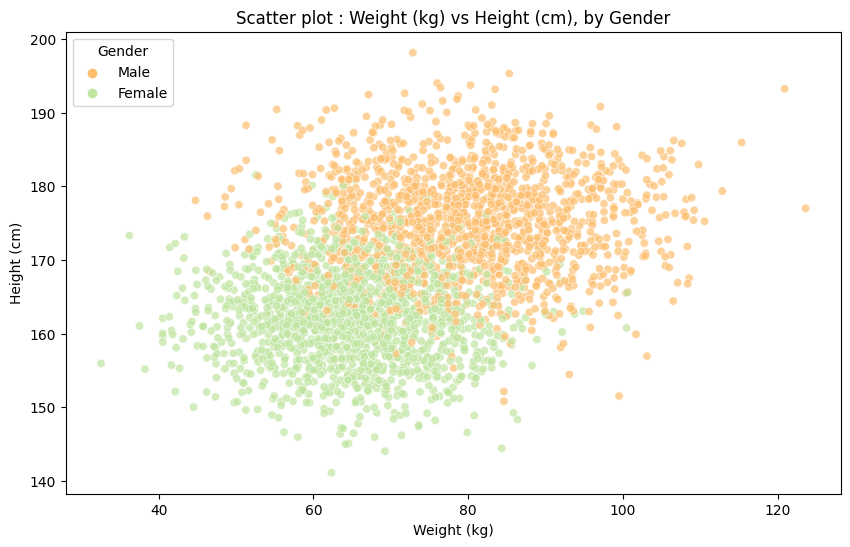

In [14]:
# Convert PySpark datas as a pandas DataFrame in order to use seaborn:
df_pandas = df_filtered.toPandas()

# Create a scatter plots using seaborn and the atribute hue, for the thrird columns:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=column1, y=column2, hue=column3, data=df_pandas, palette="Spectral", alpha=0.7)

# Add titles and labels
plt.title("Scatter plot : "+column1+" vs "+column2+", by "+column3)
plt.xlabel(column1)
plt.ylabel(column2)
plt.show()

## Example 2 : GroupBy and aggregation with PySpark, before visualisation

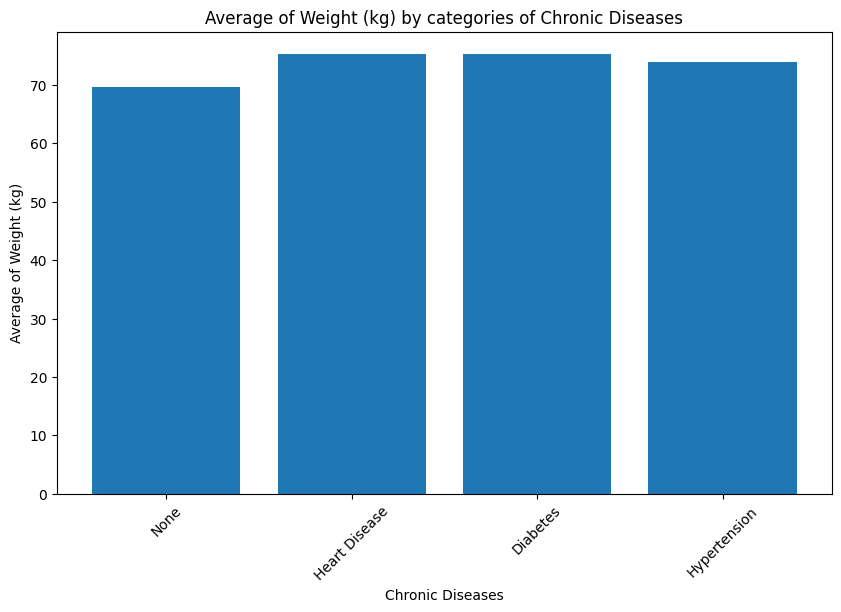

In [15]:
# Aggregation : average of "column 2" grouped by "column 1":
column1="Chronic Diseases"
column2="Weight (kg)"
df_grouped = df_train.groupBy(column1).avg(column2) # PySpark rename the resulting column automatically as "avg(Height (cm))"

# Collect the aggregated datas :
grouped_data = df_grouped.collect()

# Separate the datas for matplotlib
categories = [row[column1] for row in grouped_data]
averages = [row["avg("+column2+")"] for row in grouped_data] # So here, we must use this new naming.

# Visualisation with bar plots:
plt.figure(figsize=(10, 6))
plt.bar(categories, averages)
plt.title("Average of "+column2+" by categories of "+column1)
plt.xlabel(column1)
plt.ylabel("Average of "+column2)
plt.xticks(rotation=45)
plt.show()

We can observe that people with Heart Diseases and Diabetes, have bigger in average bigger weights (Kg) than people who haven't.

### Example 3 : Histogram with Pyspark and seaborn: 

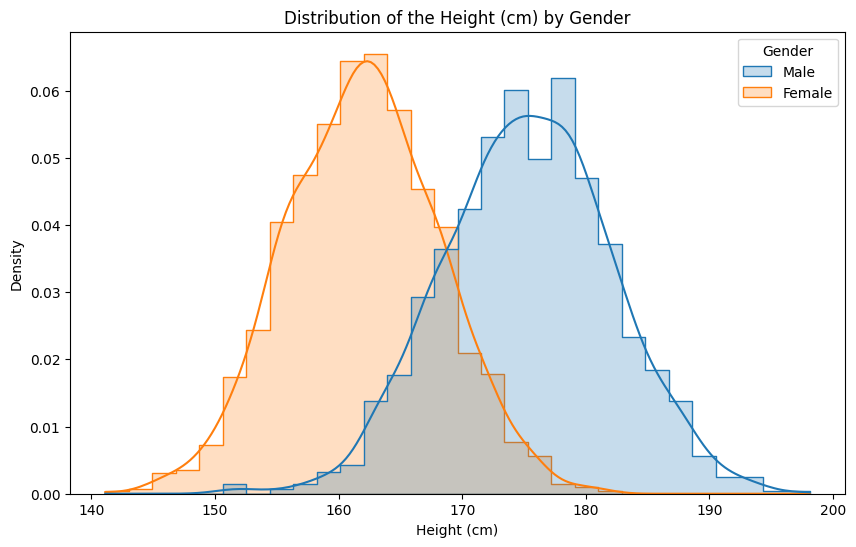

In [16]:
# Convert PySpark datas on pandas DataFrame
df_pandas = df_filtered.toPandas()

# Create an histogram using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data=df_pandas, x="Height (cm)", bins=30, hue="Gender", kde=True, element="step", stat="density", common_norm=False)

# Add some titles and labels
plt.title("Distribution of the Height (cm) by Gender")
plt.xlabel("Height (cm)")
plt.ylabel("Density")
plt.show()

We can note that distributions of heights for men and women, give two gaussians with similar variance, but with a higher mean for mens as expectable.

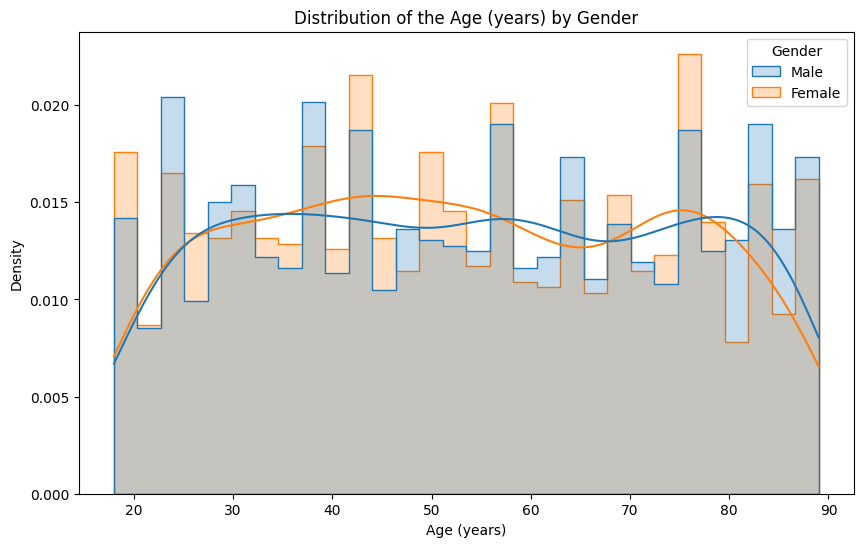

In [17]:
# Filter the datas to get columns to plot:
column1="Age (years)"
column2="Gender"
df_filtered = df_train.select(column1, column2).dropna()

# Convert PySpark datas on pandas DataFrame
df_pandas = df_filtered.toPandas()

# Create an histogram using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data=df_pandas, x="Age (years)", bins=30, hue="Gender", kde=True, element="step", stat="density", common_norm=False)

# Add some titles and labels
plt.title("Distribution of the Age (years) by Gender")
plt.xlabel("Age (years)")
plt.ylabel("Density")
plt.show()

We can observe that train datas, group features for human between 18 and 89 years old and the gender distributions by Age are similar.

# III) Apply Pre-Processing methods on datasets.

- Descriptive Statistics Analysis.
- Correlation coefficient Analysis.
- NaN values exploration.
- Mapping of categorical features.

In [18]:
# Computation of basic descriptive statistics for analysis.

df_train.describe().show()

+-------+------+------------------+------------------+--------------------+-------------------------+------------------+---------------------------+--------------------+------------------+--------------------+-----------------------+--------------+-------------------+----------+----------------+--------------+--------------+------------------+--------------------+--------------+------------------+--------------------+--------------------+---------------+------------+------------------+
|summary|Gender|       Height (cm)|       Weight (kg)|Blood Pressure (s/d)|Cholesterol Level (mg/dL)|               BMI|Blood Glucose Level (mg/dL)|Bone Density (g/cm²)|  Vision Sharpness|Hearing Ability (dB)|Physical Activity Level|Smoking Status|Alcohol Consumption|      Diet|Chronic Diseases|Medication Use|Family History|Cognitive Function|Mental Health Status|Sleep Patterns|     Stress Levels|  Pollution Exposure|        Sun Exposure|Education Level|Income Level|       Age (years)|
+-------+------+--

For train datas:
- Negative values for Bone Density are normal. 

- Blood Pressure feature must be divided between systolic and diastolic in mmHg.

In [19]:
from pyspark.sql.functions import split

# Blood Pressure (s/d) is the column of strings to divide on "/". Systolic and Diastolic are name the 2 new columns.
col="Blood Pressure (s/d)"
col1="Systolic (mmHg)"
col2="Diastolic (mmHg)"
df_train = df_train.withColumn(col1, split(df_train[col], "/").getItem(0)).withColumn(col2, split(df_train[col], "/").getItem(1)).drop(col)
df_test = df_test.withColumn(col1, split(df_test[col], "/").getItem(0)).withColumn(col2, split(df_test[col], "/").getItem(1)).drop(col)
# We also remove the columns Blood Pressure (s/d), from the datasets.

# Affiche le DataFrame avec les nouvelles colonnes
df_train.show(5)

+------+------------------+------------------+-------------------------+------------------+---------------------------+--------------------+-------------------+--------------------+-----------------------+--------------+-------------------+----------+----------------+--------------+--------------+------------------+--------------------+--------------+------------------+------------------+------------------+---------------+------------+-----------+---------------+----------------+
|Gender|       Height (cm)|       Weight (kg)|Cholesterol Level (mg/dL)|               BMI|Blood Glucose Level (mg/dL)|Bone Density (g/cm²)|   Vision Sharpness|Hearing Ability (dB)|Physical Activity Level|Smoking Status|Alcohol Consumption|      Diet|Chronic Diseases|Medication Use|Family History|Cognitive Function|Mental Health Status|Sleep Patterns|     Stress Levels|Pollution Exposure|      Sun Exposure|Education Level|Income Level|Age (years)|Systolic (mmHg)|Diastolic (mmHg)|
+------+------------------+---

### Correlation Coefficient Analysis:

In [20]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation
from pyspark.sql.functions import col

# Select the numerical features and also the target so:
numeric_columns = [col_name for col_name, dtype in df_train.dtypes if dtype in ['int', 'double']]

# Use of VectorAssembler to combine all the numerical columns into an unique vector:
assembler = VectorAssembler(inputCols=numeric_columns, outputCol="features")
vector_df = assembler.transform(df_train).select("features")

# Compute the correlation matrix:
correlation_matrix = Correlation.corr(vector_df, "features").head()[0]

# Print Correlation Matrix as a pandas DataFrame:
corr_matrix_df = pd.DataFrame(correlation_matrix.toArray(), index=numeric_columns, columns=numeric_columns)
print("Correlation Matrix : \n", corr_matrix_df["Age (years)"])

Correlation Matrix : 
 Height (cm)                    0.020322
Weight (kg)                    0.002521
Cholesterol Level (mg/dL)      0.432368
BMI                           -0.008042
Blood Glucose Level (mg/dL)    0.428573
Bone Density (g/cm²)          -0.937712
Vision Sharpness              -0.899692
Hearing Ability (dB)           0.712374
Cognitive Function            -0.508058
Stress Levels                  0.029093
Pollution Exposure            -0.010464
Sun Exposure                   0.009245
Age (years)                    1.000000
Name: Age (years), dtype: float64


Thanks to this observation, we can say that Cholesterol Level (mg/dL), Blood Glucose Level (mg/dL) and Cognitive Function are significantly correlated to the Age (years) of a human.

We can also see that Bone Density (g/cm²), Vision Sharpness and Hearing Ability (dB) are highly correlated to the Age (years) of humans, so these features are more helpful, to determine the right Age of a people.

We can also conclude that Height (cm), Weight (kg), BMI, Stress Levels, Pollution Exposure ans Sun Exposure are not relevant, in order to determine the Age of peoples. This is expectable, because humans can be exposed to stress, sun and pollution, at each Age. BMI is computed from Height and Weight. These two features slightly change for adult humans.

In [21]:
corr_matrix_df[abs(corr_matrix_df)>0.6]

,Height (cm),Weight (kg),Cholesterol Level (mg/dL),BMI,Blood Glucose Level (mg/dL),Bone Density (g/cm²),Vision Sharpness,Hearing Ability (dB),Cognitive Function,Stress Levels,Pollution Exposure,Sun Exposure,Age (years)
Height (cm),1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Weight (kg),NaN,1.00000,NaN,0.80015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cholesterol Level (mg/dL),NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BMI,NaN,0.80015,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Blood Glucose Level (mg/dL),NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bone Density (g/cm²),NaN,NaN,NaN,NaN,NaN,1.000000,0.846140,-0.667803,NaN,NaN,NaN,NaN,-0.937712
Vision Sharpness,NaN,NaN,NaN,NaN,NaN,0.846140,1.000000,-0.639199,NaN,NaN,NaN,NaN,-0.899692
Hearing Ability (dB),NaN,NaN,NaN,NaN,NaN,-0.667803,-0.639199,1.000000,NaN,NaN,NaN,NaN,0.712374
Cognitive Function,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
Stress Levels,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


Looking at the correlation levels among the features, we can identify a group of 4 highly correlated ones, composed of Bone Density (g/cm²), Vision Sharpness, Hearing Ability (dB) and Age (years), for a correlation over 60% (positively and negatively). We can extend this group with the Cognitive Function considering correlations over 50% and Cholesterol Level (mg/dL) considering correlations over 40%.

### NaN values exploration:

In [22]:
from pyspark.sql.functions import col, sum, when, isnan

# Compter les valeurs NaN ou NULL par colonne
missing_counts = df_train.select([sum(when(col(c).isNull() | isnan(col(c)), 1).otherwise(0)).alias(c) for c in df_train.columns])

# Afficher les résultats
missing_counts.show()

+------+-----------+-----------+-------------------------+---+---------------------------+--------------------+----------------+--------------------+-----------------------+--------------+-------------------+----+----------------+--------------+--------------+------------------+--------------------+--------------+-------------+------------------+------------+---------------+------------+-----------+---------------+----------------+
|Gender|Height (cm)|Weight (kg)|Cholesterol Level (mg/dL)|BMI|Blood Glucose Level (mg/dL)|Bone Density (g/cm²)|Vision Sharpness|Hearing Ability (dB)|Physical Activity Level|Smoking Status|Alcohol Consumption|Diet|Chronic Diseases|Medication Use|Family History|Cognitive Function|Mental Health Status|Sleep Patterns|Stress Levels|Pollution Exposure|Sun Exposure|Education Level|Income Level|Age (years)|Systolic (mmHg)|Diastolic (mmHg)|
+------+-----------+-----------+-------------------------+---+---------------------------+--------------------+----------------+

There are no missing values on train datas.

In [23]:
from pyspark.sql.functions import col, sum, when, isnan

# Count NaN or NULL values by column
missing_counts = df_test.select([sum(when(col(c).isNull() | isnan(col(c)), 1).otherwise(0)).alias(c) for c in df_test.columns])

# Print the results
missing_counts.show()

+------+-----------+-----------+-------------------------+---+---------------------------+--------------------+----------------+--------------------+-----------------------+--------------+-------------------+----+----------------+--------------+--------------+------------------+--------------------+--------------+-------------+------------------+------------+---------------+------------+---------------+----------------+
|Gender|Height (cm)|Weight (kg)|Cholesterol Level (mg/dL)|BMI|Blood Glucose Level (mg/dL)|Bone Density (g/cm²)|Vision Sharpness|Hearing Ability (dB)|Physical Activity Level|Smoking Status|Alcohol Consumption|Diet|Chronic Diseases|Medication Use|Family History|Cognitive Function|Mental Health Status|Sleep Patterns|Stress Levels|Pollution Exposure|Sun Exposure|Education Level|Income Level|Systolic (mmHg)|Diastolic (mmHg)|
+------+-----------+-----------+-------------------------+---+---------------------------+--------------------+----------------+--------------------+---

For test datas, there are missing values only on categorical features (Alcohol Consumption, Chronic Diseases, Medication Use, Family History, Education Level). 

In [24]:
# on train datas:
categorical_col_with_NaN=["Alcohol Consumption", "Chronic Diseases", "Medication Use", "Family History", "Education Level"]
for col in categorical_col_with_NaN:
    df_train.groupBy(col).count().show()

+-------------------+-----+
|Alcohol Consumption|count|
+-------------------+-----+
|               None| 1201|
|           Frequent|  742|
|         Occasional| 1057|
+-------------------+-----+

+----------------+-----+
|Chronic Diseases|count|
+----------------+-----+
|            None| 1299|
|   Heart Disease|  493|
|        Diabetes|  532|
|    Hypertension|  676|
+----------------+-----+

+--------------+-----+
|Medication Use|count|
+--------------+-----+
|          None| 1198|
|       Regular| 1063|
|    Occasional|  739|
+--------------+-----+

+--------------+-----+
|Family History|count|
+--------------+-----+
|          None| 1451|
| Heart Disease|  453|
|      Diabetes|  645|
|  Hypertension|  451|
+--------------+-----+

+---------------+-----+
|Education Level|count|
+---------------+-----+
|    High School|  883|
|           None|  627|
|  Undergraduate|  884|
|   Postgraduate|  606|
+---------------+-----+



In [25]:
# on test datas:
categorical_col_with_NaN=["Alcohol Consumption", "Chronic Diseases", "Medication Use", "Family History", "Education Level"]
for col in categorical_col_with_NaN:
    df_test.groupBy(col).count().show()

+-------------------+-----+
|Alcohol Consumption|count|
+-------------------+-----+
|               NULL| 1201|
|           Frequent|  742|
|         Occasional| 1057|
+-------------------+-----+

+----------------+-----+
|Chronic Diseases|count|
+----------------+-----+
|            NULL| 1299|
|   Heart Disease|  493|
|        Diabetes|  532|
|    Hypertension|  676|
+----------------+-----+

+--------------+-----+
|Medication Use|count|
+--------------+-----+
|          NULL| 1198|
|       Regular| 1063|
|    Occasional|  739|
+--------------+-----+

+--------------+-----+
|Family History|count|
+--------------+-----+
|          NULL| 1451|
| Heart Disease|  453|
|      Diabetes|  645|
|  Hypertension|  451|
+--------------+-----+

+---------------+-----+
|Education Level|count|
+---------------+-----+
|    High School|  883|
|  Undergraduate|  884|
|           NULL|  627|
|   Postgraduate|  606|
+---------------+-----+



With these two last observations, we can observe that the values "None" of the train datas, for these categorical features are missing on the test datas. So we can reasonably assess that the NaN values of test datas, are in realty "None" values. I will now replace the NaN values, by "None" on test datas.

In [26]:
# Replace NaN values by "None" on specific columns:
df_test2 = df_test.fillna("None", subset=categorical_col_with_NaN)

In [27]:
# to check, if Null are well replaced by None:
categorical_col_with_NaN=["Alcohol Consumption", "Chronic Diseases", "Medication Use", "Family History", "Education Level"]
for col in categorical_col_with_NaN:
    df_test2.groupBy(col).count().show()

+-------------------+-----+
|Alcohol Consumption|count|
+-------------------+-----+
|               None| 1201|
|           Frequent|  742|
|         Occasional| 1057|
+-------------------+-----+

+----------------+-----+
|Chronic Diseases|count|
+----------------+-----+
|            None| 1299|
|   Heart Disease|  493|
|        Diabetes|  532|
|    Hypertension|  676|
+----------------+-----+

+--------------+-----+
|Medication Use|count|
+--------------+-----+
|          None| 1198|
|       Regular| 1063|
|    Occasional|  739|
+--------------+-----+

+--------------+-----+
|Family History|count|
+--------------+-----+
|          None| 1451|
| Heart Disease|  453|
|      Diabetes|  645|
|  Hypertension|  451|
+--------------+-----+

+---------------+-----+
|Education Level|count|
+---------------+-----+
|    High School|  883|
|           None|  627|
|  Undergraduate|  884|
|   Postgraduate|  606|
+---------------+-----+



In [28]:
# Other check, if we have no more missing values:
from pyspark.sql.functions import col, sum, when, isnan

# Count NaN or NULL values by column
missing_counts = df_test2.select([sum(when(col(c).isNull() | isnan(col(c)), 1).otherwise(0)).alias(c) for c in df_test2.columns])

# Print the results
missing_counts.show()

+------+-----------+-----------+-------------------------+---+---------------------------+--------------------+----------------+--------------------+-----------------------+--------------+-------------------+----+----------------+--------------+--------------+------------------+--------------------+--------------+-------------+------------------+------------+---------------+------------+---------------+----------------+
|Gender|Height (cm)|Weight (kg)|Cholesterol Level (mg/dL)|BMI|Blood Glucose Level (mg/dL)|Bone Density (g/cm²)|Vision Sharpness|Hearing Ability (dB)|Physical Activity Level|Smoking Status|Alcohol Consumption|Diet|Chronic Diseases|Medication Use|Family History|Cognitive Function|Mental Health Status|Sleep Patterns|Stress Levels|Pollution Exposure|Sun Exposure|Education Level|Income Level|Systolic (mmHg)|Diastolic (mmHg)|
+------+-----------+-----------+-------------------------+---+---------------------------+--------------------+----------------+--------------------+---

No more NaN values.

### Mapping of categorical features:

In [29]:
df_train.printSchema

<bound method DataFrame.printSchema of DataFrame[Gender: string, Height (cm): double, Weight (kg): double, Cholesterol Level (mg/dL): double, BMI: double, Blood Glucose Level (mg/dL): double, Bone Density (g/cm²): double, Vision Sharpness: double, Hearing Ability (dB): double, Physical Activity Level: string, Smoking Status: string, Alcohol Consumption: string, Diet: string, Chronic Diseases: string, Medication Use: string, Family History: string, Cognitive Function: double, Mental Health Status: string, Sleep Patterns: string, Stress Levels: double, Pollution Exposure: double, Sun Exposure: double, Education Level: string, Income Level: string, Age (years): int, Systolic (mmHg): string, Diastolic (mmHg): string]>

In [30]:
from pyspark.sql.functions import when, col
from pyspark.sql import functions as F

# Mappings for each column:
mappings = {
    'Gender': {'Female': 0, 'Male': 1},
    'Physical Activity Level': {'Low': 0, 'Moderate': 1, 'High': 2},
    'Smoking Status': {'Never': 0, 'Former': 1, 'Current': 2},
    'Alcohol Consumption': {'None': 0, 'Occasional': 1, 'Frequent': 2},
    'Diet': {'Balanced': 0, 'Vegetarian': 1, 'Low-carb': 2, 'High-fat': 3},
    'Chronic Diseases': {'None': 0, 'Hypertension': 1, 'Diabetes': 2, 'Heart Disease': 3},
    'Medication Use': {'None': 0, 'Regular': 1, 'Occasional': 2},
    'Family History': {'None': 0, 'Hypertension': 1, 'Diabetes': 2, 'Heart Disease': 3},
    'Mental Health Status': {'Poor': 0, 'Fair': 1, 'Good': 2, 'Excellent': 3},
    'Sleep Patterns': {'Normal': 0, 'Insomnia': 1, 'Excessive': 2},
    'Education Level': {'None': 0, 'High School': 1, 'Undergraduate': 2, 'Postgraduate': 3},
    'Income Level': {'Low': 0, 'Medium': 1, 'High': 2}
}

# Loop to apply the mappings
for col_name, mapping_dict in mappings.items():
    # Start with the first condition
    condition = when(col(col_name) == list(mapping_dict.keys())[0], list(mapping_dict.values())[0])
    
    # Add the others conditions
    for k, v in list(mapping_dict.items())[1:]:
        condition = condition.when(col(col_name) == k, v)
    
    # Apply the condition to the DataFrame
    df_train = df_train.withColumn(col_name, condition.otherwise(col(col_name)))
    df_test2 = df_test2.withColumn(col_name, condition.otherwise(col(col_name)))

    df_train = df_train.withColumn(col_name, F.col(col_name).cast("integer"))
    df_test2 = df_test2.withColumn(col_name, F.col(col_name).cast("integer"))

# To check, if categorical variable are well mapped
df_train.show(5)
df_test2.show(5)

+------+------------------+------------------+-------------------------+------------------+---------------------------+--------------------+-------------------+--------------------+-----------------------+--------------+-------------------+----+----------------+--------------+--------------+------------------+--------------------+--------------+------------------+------------------+------------------+---------------+------------+-----------+---------------+----------------+
|Gender|       Height (cm)|       Weight (kg)|Cholesterol Level (mg/dL)|               BMI|Blood Glucose Level (mg/dL)|Bone Density (g/cm²)|   Vision Sharpness|Hearing Ability (dB)|Physical Activity Level|Smoking Status|Alcohol Consumption|Diet|Chronic Diseases|Medication Use|Family History|Cognitive Function|Mental Health Status|Sleep Patterns|     Stress Levels|Pollution Exposure|      Sun Exposure|Education Level|Income Level|Age (years)|Systolic (mmHg)|Diastolic (mmHg)|
+------+------------------+---------------

In [31]:
# We must also change to integer, the datatypes of the new predictors columns, for train and test datas:
df_train = df_train.withColumn("Systolic (mmHg)", F.col("Systolic (mmHg)").cast("integer"))
df_train = df_train.withColumn("Diastolic (mmHg)", F.col("Diastolic (mmHg)").cast("integer"))
df_test2 = df_test2.withColumn("Systolic (mmHg)", F.col("Systolic (mmHg)").cast("integer"))
df_test2 = df_test2.withColumn("Diastolic (mmHg)", F.col("Diastolic (mmHg)").cast("integer"))

In [32]:
# To check, if it works:
df_train.printSchema

<bound method DataFrame.printSchema of DataFrame[Gender: int, Height (cm): double, Weight (kg): double, Cholesterol Level (mg/dL): double, BMI: double, Blood Glucose Level (mg/dL): double, Bone Density (g/cm²): double, Vision Sharpness: double, Hearing Ability (dB): double, Physical Activity Level: int, Smoking Status: int, Alcohol Consumption: int, Diet: int, Chronic Diseases: int, Medication Use: int, Family History: int, Cognitive Function: double, Mental Health Status: int, Sleep Patterns: int, Stress Levels: double, Pollution Exposure: double, Sun Exposure: double, Education Level: int, Income Level: int, Age (years): int, Systolic (mmHg): int, Diastolic (mmHg): int]>

# IV) Fit several Machine Learning models, with pyspark tools.

## Fit a multilinear regression model with PySpark:

In [33]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression

# Define predictors columns used to predict the Age:
feature_columns = [col for col in df_train.columns if col != 'Age (years)']

# Select and filter columns for train and test datas:
df_train_filtered = df_train.select("Age (years)", *feature_columns).dropna()
df_test_filtered = df_test2.select(*feature_columns).dropna()

# Conversion of columns selected as predictors, into one vector with PySpark:
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")

# Transformation of train and test datas, respectively to the vector type previously defined:
df_train_assembled = assembler.transform(df_train_filtered)
df_test_assembled = assembler.transform(df_test_filtered)

# Split of train datas, between datas used to fit the model and dates used to validate, its fit.
train_data, validation_data = df_train_assembled.randomSplit([0.7, 0.3], seed=42)

#### Fit the model:

In [34]:
# Definition of Linear Regression Model, with our predictors previously grouped as the vector "features" and the target "Age (years)":
lr = LinearRegression(featuresCol="features", labelCol="Age (years)")
# Fit of the model with train datas:
lr_model = lr.fit(train_data)

#### Evaluate the model:

In [35]:
# Print of the linear coefficients, for each predictors and also of the intercept:
print(pd.DataFrame({'Predictors': feature_columns,
                   'Coefficients': lr_model.coefficients.toArray()}))
print(f"Intercept: {lr_model.intercept}")

                     Predictors  Coefficients
0                        Gender      0.616939
1                   Height (cm)     -0.150900
2                   Weight (kg)      0.146202
3     Cholesterol Level (mg/dL)      0.031727
4                           BMI     -0.474593
5   Blood Glucose Level (mg/dL)      0.044146
6          Bone Density (g/cm²)    -22.964163
7              Vision Sharpness    -29.378369
8          Hearing Ability (dB)      0.132309
9       Physical Activity Level     -0.245475
10               Smoking Status      0.378460
11          Alcohol Consumption     -0.125752
12                         Diet     -0.252636
13             Chronic Diseases      0.017445
14               Medication Use     -0.012746
15               Family History      0.222291
16           Cognitive Function     -0.073407
17         Mental Health Status     -0.054841
18               Sleep Patterns      0.170030
19                Stress Levels     -0.014306
20           Pollution Exposure   

In [36]:
# Evaluate the model on the validation datas, which are not used to fit the model:
validation_results = lr_model.evaluate(validation_data)

# Print indicators:
print(f"RMSE (Root Mean Squared Error) sur les données de validation : {validation_results.rootMeanSquaredError}")
print(f"R² : {validation_results.r2}")

RMSE (Root Mean Squared Error) sur les données de validation : 5.3549229264773075
R² : 0.9326907560177679


R² is really near to 1, so we can already that even fot a linear regression model, the fit is good.

In [37]:
# To collect model's predictions on validation datas and the true ages values, from validation datas:
validation_data_predictions = lr_model.transform(validation_data).select("prediction").toPandas()
validation_data_labels = validation_data.select("Age (years)").toPandas()

# To check that dimensions are the sames:
if len(validation_data_predictions) != len(validation_data_labels):
    raise ValueError("The predictions and the true values have not the same length on train datas.")

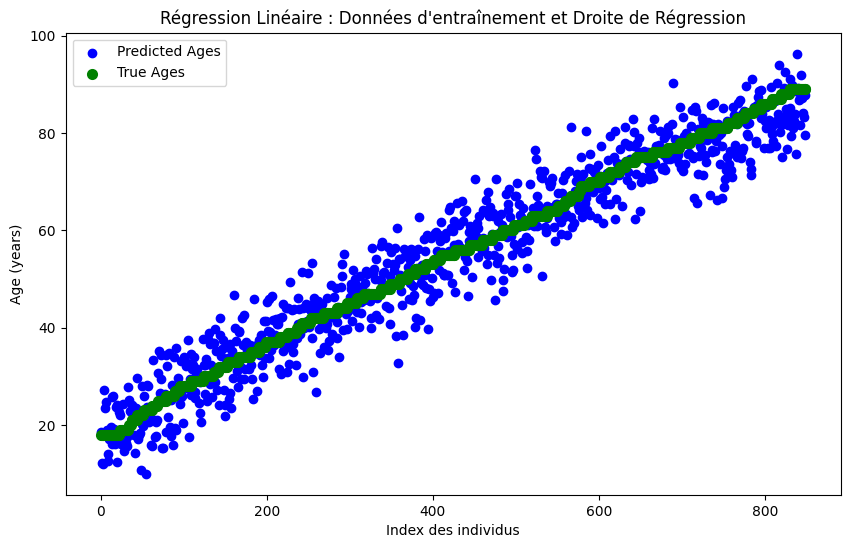

In [38]:
# Conversion of datas as lists, to make manipulation easier:
predictions_list = validation_data_predictions['prediction'].values
true_values_list = validation_data_labels['Age (years)'].values

# Creation of a scatter plot, between ages predictions and true ages values
plt.figure(figsize=(10, 6))

# Scatter plot of ages predictions on people from validation datas:
plt.scatter(range(len(predictions_list)), predictions_list, color='blue', label='Predicted Ages')

# Scatter plot of trues ages values:
plt.scatter(range(len(true_values_list)), true_values_list, color='green', linestyle='-', linewidth=2, label='True Ages')

# Add titles and labels
plt.title("Régression Linéaire : Données d'entraînement et Droite de Régression")
plt.xlabel("Index des individus")
plt.ylabel("Age (years)")
plt.legend()

# Print the scatter plot
plt.show()

In [39]:
print(f"Maximal error on predictions :",{max(abs(predictions_list-true_values_list))})
print(f"Minimal error on predictions :",{min(abs(predictions_list-true_values_list))})
print(f"Average error on predictions :",{np.mean(abs(predictions_list-true_values_list))})

Maximal error on predictions : {16.180350476021005}
Minimal error on predictions : {0.002093734926646107}
Average error on predictions : {4.281281030530034}


Even for a multilinear regression model, the predictions are already sufficiently accurate to be potentially helpful. The maximal error of age prediction is 16 years and around 3 months. The average error is only around 4 years, which is already precise.

Let's see, if we can get better with a Random Forest Regression Model.

## Fit a RandomForestRegression Model with PySpark:

In [40]:
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator

# List of feature columns (excluding target 'Age_(years)')
feature_columns = [col for col in df_train.columns if col != 'Age (years)']

# Assemble feature columns into a single feature vector
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")

# Apply assembler to training data
df_train_assembled = assembler.transform(df_train)
df_train_assembled = df_train_assembled.select("features", "Age (years)")

# Split the data into training and validation sets (70% train, 30% validation)
train_data, validation_data = df_train_assembled.randomSplit([0.7, 0.3], seed=42)

#### Fit the model:

In [41]:
# Define RandomForestRegressor model
rf = RandomForestRegressor(labelCol="Age (years)", featuresCol="features", numTrees=100)

# Train the model
rf_model = rf.fit(train_data)

#### Evaluate the model:

In [42]:
# Make predictions on the validation data
predictions = rf_model.transform(validation_data)

# Initialize evaluator for RMSE (Root Mean Squared Error)
evaluator = RegressionEvaluator(labelCol="Age (years)", predictionCol="prediction", metricName="rmse")

# Compute RMSE on validation data
rmse = evaluator.evaluate(predictions)
print(f"Root Mean Squared Error (RMSE) on validation data = {rmse}")

# Feature importances
importances = rf_model.featureImportances
print(f"Feature Importances: {importances}")

Root Mean Squared Error (RMSE) on validation data = 5.301437955232367
Feature Importances: (26,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25],[5.868105767362403e-05,0.00037127927327240364,0.0003977171846448286,0.006702465156497957,0.0002917144261302239,0.005891879565920444,0.4396858327980273,0.30671829079536245,0.1057759514006963,8.548761442474566e-05,0.001302154702581155,8.86629486103527e-05,7.440979524153912e-05,7.255958350766068e-05,6.680919752251937e-05,2.8141183505985056e-05,0.015614729708956422,0.00017488394489062906,3.619126528726227e-05,0.0002869502815744977,0.00027310849224563904,0.0004072126581008691,0.0002103923458905965,4.65960676967247e-05,0.06026903129646126,0.055068867255276654])


The RSME of Random Forest regression Model is slightly better than the RSME of Linear Regression Model. The two models seems to be equivalent.

In [43]:
# print importance of each associated columns:
for col, importance in zip(feature_columns, importances):
    print(f"{col}: {importance}")

Gender: 5.868105767362403e-05
Height (cm): 0.00037127927327240364
Weight (kg): 0.0003977171846448286
Cholesterol Level (mg/dL): 0.006702465156497957
BMI: 0.0002917144261302239
Blood Glucose Level (mg/dL): 0.005891879565920444
Bone Density (g/cm²): 0.4396858327980273
Vision Sharpness: 0.30671829079536245
Hearing Ability (dB): 0.1057759514006963
Physical Activity Level: 8.548761442474566e-05
Smoking Status: 0.001302154702581155
Alcohol Consumption: 8.86629486103527e-05
Diet: 7.440979524153912e-05
Chronic Diseases: 7.255958350766068e-05
Medication Use: 6.680919752251937e-05
Family History: 2.8141183505985056e-05
Cognitive Function: 0.015614729708956422
Mental Health Status: 0.00017488394489062906
Sleep Patterns: 3.619126528726227e-05
Stress Levels: 0.0002869502815744977
Pollution Exposure: 0.00027310849224563904
Sun Exposure: 0.0004072126581008691
Education Level: 0.0002103923458905965
Income Level: 4.65960676967247e-05
Systolic (mmHg): 0.06026903129646126
Diastolic (mmHg): 0.055068867255

Bone Density (g/cm²) 49.7%, Vision Sharpness 24.7%, Hearing Ability (dB) 9.6%, Systolic (mmHg) 7%, Diastolic (mmHg) 5% and Cognitive Function 1% are the most important features, for the random forest regression model. They represent 96% of the influences on the predictions.

In [44]:
# To collect model's predictions on validation datas and the true ages values, from validation datas:
validation_data_predictions = rf_model.transform(validation_data).select("prediction").toPandas()
validation_data_labels = validation_data.select("Age (years)").toPandas()

# To check that dimensions are the sames:
if len(validation_data_predictions) != len(validation_data_labels):
    raise ValueError("The predictions and the true values have not the same length on train datas.")

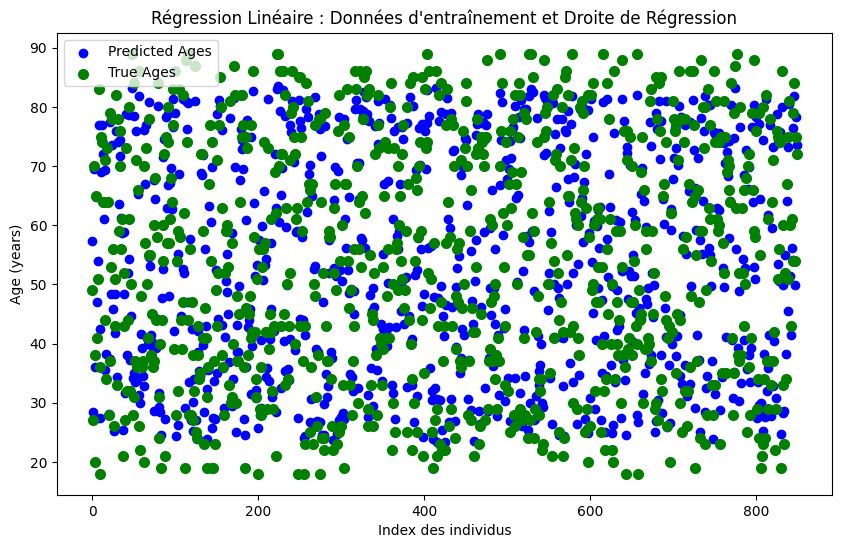

In [45]:
# Conversion of datas as lists, to make manipulation easier:
predictions_list = validation_data_predictions['prediction'].values
true_values_list = validation_data_labels['Age (years)'].values

# Creation of a scatter plot, between ages predictions and true ages values
plt.figure(figsize=(10, 6))

# Scatter plot of ages predictions on people from validation datas:
plt.scatter(range(len(predictions_list)), predictions_list, color='blue', label='Predicted Ages')

# Scatter plot of trues ages values:
plt.scatter(range(len(true_values_list)), true_values_list, color='green', linestyle='-', linewidth=2, label='True Ages')

# Add titles and labels
plt.title("Régression Linéaire : Données d'entraînement et Droite de Régression")
plt.xlabel("Index des individus")
plt.ylabel("Age (years)")
plt.legend()

# Print the scatter plot
plt.show()

In [53]:
print(f"Maximal error on predictions :",{max(abs(predictions_list-true_values_list))})
print(f"Minimal error on predictions :",{min(abs(predictions_list-true_values_list))})
print(f"Average error on predictions :",{np.mean(abs(predictions_list-true_values_list))})

Maximal error on predictions : {16.450703635686466}
Minimal error on predictions : {0.01839611788736306}
Average error on predictions : {4.276983928146846}


Even if it is a more complex model, the random forest regression one gives predictions, which are equivalent to those from linear regression model in term of accuracy. The predictions are also sufficiently accurate to be potentially helpful. The maximal error of age prediction is 16 years and the average error is only around 4 years, which is also already precise.

If we apply the occam's rasor principle, with the same precision the simplest model is the best, because more interpretable. So it's better to consider, the linear regression model for our future predictions.

# V) Make predictions on the test dataset, with the fitted models on train dataset.

In [52]:
# Make predictions with the Linear Regression Model:
predictions_lr = lr_model.transform(df_test_assembled).withColumnRenamed("prediction", "prediction_lr")

# Make predictions with the Random Forest Regression Model:
predictions_rf = rf_model.transform(df_test_assembled).withColumnRenamed("prediction", "prediction_rf")

# Select only the columns of the "features" and of the model's "predictions":
predictions_lr = predictions_lr.select("features", "prediction_lr")
predictions_rf = predictions_rf.select("features", "prediction_rf")

# Join the 2 DataFrames on the column "features" (It is the same features on each row, because of the attribute seed=42 on the split):
combined_predictions = predictions_lr.join(predictions_rf, on="features", how="inner")

# Print the results
combined_predictions.show(truncate=True)

+--------------------+------------------+------------------+
|            features|     prediction_lr|     prediction_rf|
+--------------------+------------------+------------------+
|[1.0,171.14835857...| 87.24952100680713| 81.77307837705807|
|[1.0,172.94620597...| 71.78983757986822|  71.6989053854141|
|[0.0,155.94548794...|  75.0655118854783|  75.6419517700883|
|[0.0,169.07829806...| 51.62848117606254| 45.89911854026927|
|[0.0,163.75835547...| 75.15931509341135| 75.82804525716196|
|[1.0,174.89161661...|28.553233075922748|29.507799119795013|
|[1.0,178.58696612...| 79.51479612678949| 76.40985179992141|
|[0.0,168.00291364...| 24.60388257135253| 27.52626766852015|
|[0.0,164.54691746...| 53.63036905226036| 51.98271414800928|
|[0.0,164.83942574...| 82.01222104480308| 81.69139040850916|
|[1.0,179.59758131...|  75.7811410855617| 72.71347772510059|
|[1.0,183.47279043...|  65.4696687177703| 65.93200664784223|
|[1.0,173.33825627...| 70.28460825244144| 67.75013532145043|
|[0.0,159.08140340...| 1

We can observe that the age's predictions, for the features of the differents peoples from test dataset are coherent, for these two models.

## Closure of the Spark Session

In [54]:
# To free up resources, when the work is finished:
spark.stop()